In [19]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
import math

## Import and Data Cleaning

In [2]:
raw_data = pd.read_csv('epi_r.csv')

In [3]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

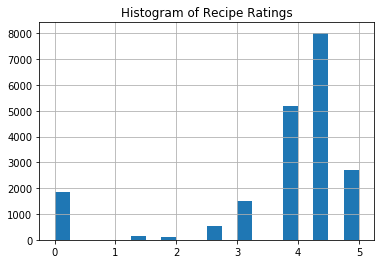

In [6]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [7]:
null_count = raw_data.isnull().sum()
null_count[null_count > 0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
len(raw_data)

20052

In [10]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], axis=1)
Y = raw_data['rating']
start_time = time.time()
svr.fit(X,Y)
print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))

Time taken: 422.1 seconds


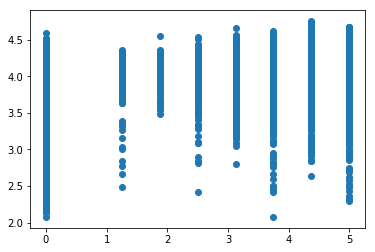

In [11]:
plt.scatter(Y, svr.predict(X))

## Analysis
### Run SVM as Regressor
Score = 0.0386

In [12]:
#svr.score(X, Y)

0.038565706512988962

### Re-run SVM as Classifier to Try for Better Results
Score = 0.417 - much better than with SVM as a regressor.

In [27]:
classifier_dict = {0:'0+',1:'1+', 2:'2+', 3:'3+', 4:'4+', 5:'5'}
raw_data['categ'] = [classifier_dict[math.floor(raw_data['rating'][i])] for i in range(0, len(raw_data))]

In [29]:
from sklearn.svm import SVC
svc = SVC()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium', 'categ'], axis=1)
Y = raw_data['categ']
start_time = time.time()
svc.fit(X,Y)
print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))

Time taken: 646.2 seconds


In [30]:
svc.score(X, Y)

0.41716537003790144

### Cross Validation Matrix for Classifier Approach

In [31]:
start_time = time.time()
from sklearn.model_selection import cross_val_score
print(cross_val_score(svc, X, Y, cv=5))
print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))

Time taken: 2365.5 seconds


## Other Methods - Feature Selection
### 1. Use a Correlation Matrix to Select the 30 Most Positively and Negatively Correlated Features
Find the 30 features that correlate best with the 'rating' variable, and run SVM only on those.

In [32]:
corrmat = raw_data.corr()
corrmat

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
rating,1.000000,0.007882,0.013980,0.007236,0.008177,0.003147,0.006771,0.011155,-0.047840,0.006717,...,-0.003016,-0.023807,0.006771,0.007179,0.002294,-0.009179,-0.051770,-0.037606,-0.006739,0.022599
calories,0.007882,1.000000,0.742816,0.996538,0.996392,-0.000208,-0.000135,-0.000470,-0.000582,-0.000306,...,-0.000597,-0.002484,-0.000134,-0.000290,-0.001970,-0.000180,-0.000283,-0.000616,-0.000484,-0.002255
protein,0.013980,0.742816,1.000000,0.712194,0.749287,-0.000323,-0.000201,-0.000464,-0.000756,-0.000257,...,-0.000858,-0.003113,-0.000197,-0.000354,-0.002561,-0.000231,-0.000289,-0.000882,-0.000701,-0.000742
fat,0.007236,0.996538,0.712194,1.000000,0.986476,-0.000215,-0.000132,-0.000454,-0.000559,-0.000289,...,-0.000578,-0.002387,-0.000132,-0.000289,-0.001894,-0.000174,-0.000277,-0.000594,-0.000464,-0.002215
sodium,0.008177,0.996392,0.749287,0.986476,1.000000,-0.000273,-0.000143,-0.000444,-0.000594,-0.000307,...,-0.000619,-0.002606,-0.000137,-0.000301,-0.002023,-0.000172,-0.000286,-0.000635,-0.000506,-0.001856
#cakeweek,0.003147,-0.000208,-0.000323,-0.000215,-0.000273,1.000000,-0.000122,-0.000504,-0.000635,-0.000323,...,-0.000611,-0.002845,-0.000122,-0.000299,-0.002125,-0.000212,-0.000323,-0.000647,-0.000533,-0.002639
#wasteless,0.006771,-0.000135,-0.000201,-0.000132,-0.000143,-0.000122,1.000000,-0.000206,-0.000259,-0.000132,...,-0.000250,-0.001161,-0.000050,-0.000122,-0.000867,-0.000086,-0.000132,-0.000264,-0.000217,-0.001077
22-minute meals,0.011155,-0.000470,-0.000464,-0.000454,-0.000444,-0.000504,-0.000206,1.000000,-0.001070,0.091180,...,-0.001029,0.005911,-0.000206,-0.000504,0.010584,-0.000356,0.091180,-0.001089,-0.000897,0.007050
3-ingredient recipes,-0.047840,-0.000582,-0.000756,-0.000559,-0.000594,-0.000635,-0.000259,-0.001070,1.000000,-0.000686,...,-0.001297,0.002455,-0.000259,-0.000635,-0.004510,-0.000449,-0.000686,0.035047,-0.001131,0.003521
30 days of groceries,0.006717,-0.000306,-0.000257,-0.000289,-0.000307,-0.000323,-0.000132,0.091180,-0.000686,1.000000,...,-0.000660,-0.003073,-0.000132,-0.000323,-0.002295,-0.000229,-0.000349,-0.000699,-0.000576,-0.002851


In [45]:
# Select 30 positively correlated features, then remove 'rating'
pos_corr = list(corrmat['rating'].sort_values(ascending=False).index)[:31]
del pos_corr[0]

In [46]:
len(pos_corr)

30

In [58]:
# Select 30 negatively correlated features
neg_corr = list(corrmat['rating'].sort_values(ascending=True).index)[:5]

In [59]:
# Define the reduced X dataframe for each case
Xpos = X[pos_corr]
Xneg = X[neg_corr]

In [53]:
# Fit the model to the 30 top positively correlated features
# and compute the score
start_time = time.time()
svc.fit(Xpos,Y)
print('Time taken to fit SVM Classifier(Top 30 +vely correlated Variables): {} seconds'.format('%.1f' % (time.time() - start_time)))
start_time = time.time()
print(svc.score(Xpos, Y))
print('Time taken to Compute Accuracy Score: {} seconds'.format('%.1f' % (time.time() - start_time)))

Time taken to fit SVM Classifier(Top 30 +vely correlated Variables): 58.2 seconds
0.423149810493
Time taken to Compute Accuracy Score: 35.0 seconds


In [60]:
# Fit the model to the 30 top negatively correlated features
# and again compute the accuracy score
start_time = time.time()
svc.fit(Xneg,Y)
print('Time taken to fit SVM Classifier(Top 30 -vely correlated Variables): {} seconds'.format('%.1f' % (time.time() - start_time)))
start_time = time.time()
print(svc.score(Xneg, Y))
print('Time taken to Compute Accuracy Score: {} seconds'.format('%.1f' % (time.time() - start_time)))

Time taken to fit SVM Classifier(Top 30 -vely correlated Variables): 12.1 seconds
0.416965888689
Time taken to Compute Accuracy Score: 9.6 seconds


### 2. Try the PCA Approach
Run PCA on the X dataframe, resulting in a pre-specified number of components. Run SVM on the result. Compute a cross-val matrix.

In [55]:
def PCA_and_crossval(input_df, n, target, no_folds):
    start_time = time.time()
    from sklearn.decomposition import PCA
    sklearn_pca = PCA(n_components=n)
    
    X_sklearn = sklearn_pca.fit_transform(input_df)
    print('The percentage of total variance in the dataset explained by each component from SKlearn PCA.\n',
      sklearn_pca.explained_variance_ratio_)
    print('Time taken for PCA transform: {} seconds'.format('%.3f' % (time.time() - start_time)))
    
    start_time = time.time()
    from sklearn.model_selection import cross_val_score
    from sklearn.svm import SVC
    svc = SVC()
    svc.fit(X_sklearn,target)
    cvs = cross_val_score(svc, X_sklearn, target, cv=no_folds)
    print(cvs)
    print('Time taken for cross validation: {} seconds.'.format('%.3f' % (time.time() - start_time)))
    print('Average Accuracy: {}'.format(cvs.mean()))

In [57]:
# Run PCA on X and show the cross-validation matrix:
PCA_and_crossval(X, 30, Y, 10)

The percentage of total variance in the dataset explained by each component from SKlearn PCA.
 [ 0.12310325  0.04414084  0.03883227  0.02648318  0.02280018  0.01867339
  0.01624925  0.01510961  0.01430329  0.01340297  0.01245183  0.0118638
  0.01149507  0.01031791  0.01002504  0.00932848  0.0090958   0.00888429
  0.0086766   0.00840297  0.00821629  0.00808851  0.0077805   0.00769409
  0.00755085  0.0072255   0.00709881  0.00702366  0.0067783   0.00666687]
Time taken for PCA transform: 1.225 seconds
[ 0.42102641  0.42102641  0.42771685  0.42871386  0.43120638  0.42921236
  0.43341646  0.42194514  0.42436345  0.44177911]
Time taken for cross validation: 551.861 seconds.
Average Accuracy: 0.4280406428064576
